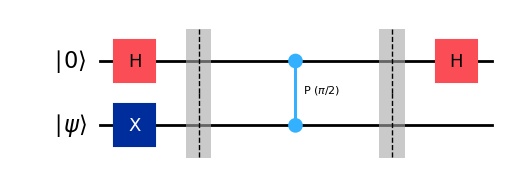

In [5]:
# If needed in your notebook:
# %pip install qiskit qiskit-aer

from math import pi
from qiskit import QuantumCircuit, QuantumRegister
from qiskit.circuit.library import PhaseGate

# --- parameters (tweak φ to taste) ---
phi = 1/4  # the phase U = Rz(2πφ) applies to the target (eigenstate)
# -------------------------------------

# Name the wires so the left labels match your diagram
ctrl = QuantumRegister(1, "∣0⟩")   # control wire label
targ = QuantumRegister(1, "∣ψ⟩")   # target/eigenstate wire label
qc = QuantumCircuit(ctrl, targ, name="Phase kickback")

# Prepare: (optionally set the target to |1> if your |ψ> is |1>)
#qc.x(targ[0])  # uncomment if you want |ψ>=|1⟩ explicitly

# H on control (left blue H in your SVG)
qc.h(ctrl[0])
qc.barrier()

# Controlled-U on target (U = Rz(2πφ)), shows as a control dot linked to a box 'U'
U = PhaseGate(2*pi*phi, label="U")   # single-qubit U with a 'U' label
cU = U.control(1)                    # make it controlled by the control qubit
qc.append(cU, [ctrl[0], targ[0]])
qc.barrier()

# H on control (right blue H in your SVG)
qc.h(ctrl[0])

# Draw inline (no saving to file)
qc.draw("mpl")

